TP2 : Ajuste de datos

1. Formular el problema de cuadrados mínimos para el ajuste solicitado, escribiendo la matriz de diseño, el vector de parámetros, el vector de datos a ajustar, las ecuaciones normales, y las dimensiones de cada uno.
2. Hallar la solución al problema resolviendo las ecuaciones normales.
3. Calcular el error de aproximación dado por ∥y − X ˆa∥.
4. Reportar los valores de los parámetros óptimos hallados redondeando a una cantidad de cifras significativas razonable.

Ejercicio 1. Ajuste lineal.
a)Hallar la recta que mejor aproxima el conjunto de datos (1) en el sentido de cuadrados mínimos.
b)Graficar en una misma figura los datos (xi, yi) junto con la recta ajustada.
c)¿Qué valor se obtendría si se usara la recta ajustada para intentar estimar el valor de la función
desconocida cuando x = 5?

# 1. Matriz de Diseño
La matriz de diseño se representa como 
${\mathbb{R}^m}$ :
$$X=
\begin{bmatrix}
    1 & x_{1}\\
    1 & x_{2}\\
    \vdots & \vdots\\
    1 & x_{m}\\
\end{bmatrix}
$$

x son los datos de la muestra y m es el tamaño de la muestra
# Vector de Parámetros
El vector de parámetros se representa como:
${\mathbb{R}^2}$ :
$$a=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
\end{bmatrix}

$$
# Vector de Datos a Ajustar
El vector de datos a ajustar se representa como:
${\mathbb{R}^m}$ :
$$
y=
\begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{m}\\
\end{bmatrix}
$$
y son los datos de la muestra y m es el tamaño de la muestra
# Ecuaciones Normales
Las ecuaciones normales para el ajuste lineal son:
$$
X^T X \theta = X^T y
$$


In [176]:
import numpy as np
import matplotlib.pyplot as plt
def Calcular_parametros_error(design, y):
    matrix_design = np.column_stack(design)

    matrix_designT = np.transpose(matrix_design)
    inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
    a = np.matmul(inverse,y)
    # Calcular el error de aproximación
    y_predicha = np.matmul(matrix_design,a)
    aproximation_error = np.sqrt(np.matmul(np.transpose(y - y_predicha),(y - y_predicha)))
    return (a,aproximation_error)
def plot(Title):
    plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(Title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

In [179]:
#vector parametros = a
#vector resultados = y
x, y = np.load("ejercicio_1.npy")
a, error = Calcular_parametros_error((np.ones_like(x),x),y)

b0 = a[0]
b1 = a[1]

# Imprimir el error de aproximación
print('3. Este es el error de aproximación dado el código:', round(error, 2))
print('4. Así obtenemos los parametros B0, B1 y los redondeamos a una cantidad de cifras significativas:  B0=', round(b0,2),'B1=', round(b1,2))
print( 'La recta que mejor aproxima el conjunto de datos es  Y =' ,round(b0,2) ,'+' , round(b1,2) ,'* x' )

3. Este es el error de aproximación dado el código: 1.57
4. Así obtenemos los parametros B0, B1 y los redondeamos a una cantidad de cifras significativas:  B0= 5.12 B1= 1.88
La recta que mejor aproxima el conjunto de datos es  Y = 5.12 + 1.88 * x


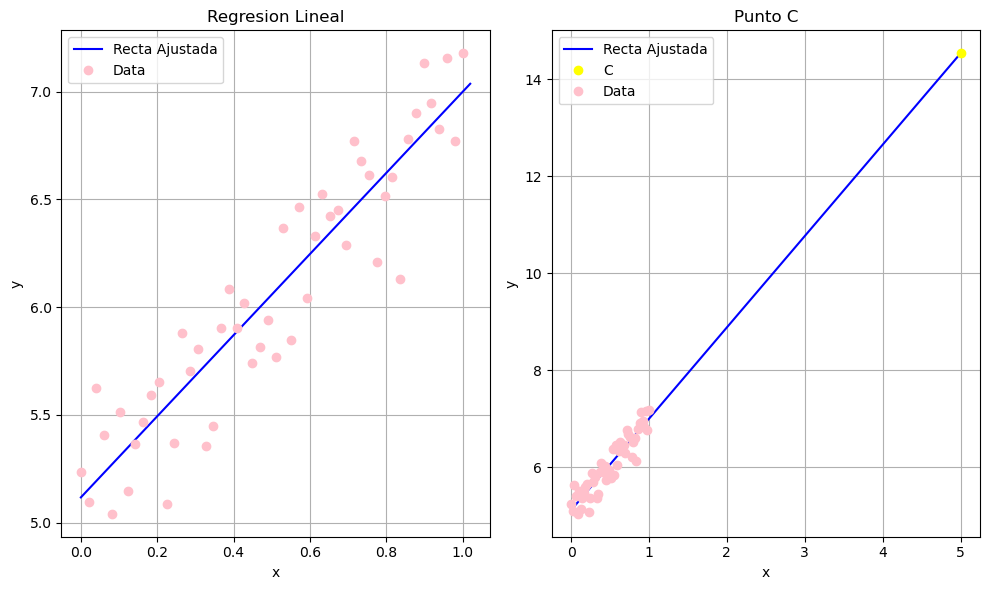

Dado x=5, si se usara la recta ajustada para intentar estimar la funcion desconocida obtendriamos:  y= 14.53


In [177]:
import matplotlib.pyplot as plt

xs = np.linspace(0, 1.02, 100)
ys = b0 + b1*xs 

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, ys, label='Recta Ajustada', color='blue')
plot('Regresion Lineal')


plt.subplot(1, 2, 2)
xs = np.linspace(0, 5, 100)
ys = b0 + b1*xs 
c = b0 + b1*5
plt.plot(xs, ys, label='Recta Ajustada', color='blue')
plt.plot(5, c, marker='o', label='C', color='yellow', linestyle='')
plot('Punto C')
plt.show()


print('Dado x=5, si se usara la recta ajustada para intentar estimar la funcion desconocida obtendriamos:  y=', round(c,2))

Ejercicio 2. Ajustes polinomiales.
a)Hallar la parábola que mejor aproxima el conjunto de datos (2) en el sentido de cuadrados mínimos.
b)Repetir con una función cúbica.
c)Graficar en una misma figura los datos junto con ambas curvas halladas.
d)¿Cuál es mejor?

3. Este es el error de aproximación dado el código para la cuadratica: 4.0
3. Este es el error de aproximación dado el código para la cubica: 1.57 

4. Así obtenemos los parametros B0, B1, B2 y los redondeamos a una cantidad de cifras significativas:  B0=-0.46 B1=-0.17 B2=0.09
La parabola que mejor aproxima el conjunto de datos es  Y = -0.46x^0 + -0.17x^1 + 0.09x^2

4. Así obtenemos los parametros B0, B1, B2, B3 y los redondeamos a una cantidad de cifras significativas:  B0=-25.95 B1=28.53 B2=-10.01 B3=1.12
La funcion que mejor aproxima el conjunto de datos es  Y = -25.95x^0 + 28.53x^1 + -10.01x^2 + 1.12x^3


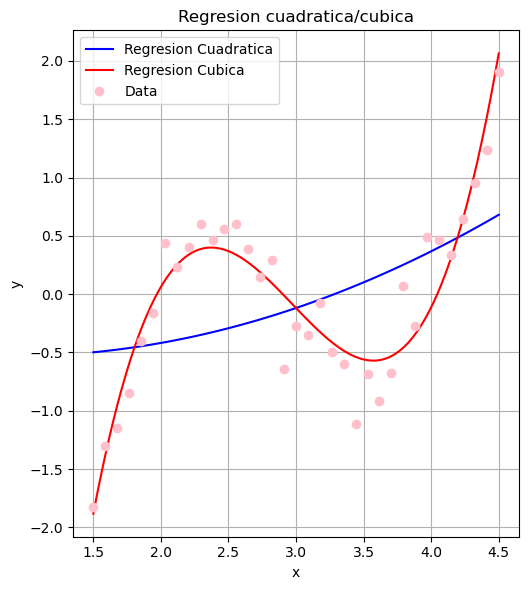

In [228]:
#vector parametros = a
import numpy as np
x, y = np.load("ejercicio_2.npy")

a2, error2 = Calcular_parametros_error((np.ones_like(x),x,x**2),y)
a3, error3 = Calcular_parametros_error((np.ones_like(x),x,x**2,x**3),y)

b0_2 = a2[0]
b1_2 = a2[1]
b2_2 = a2[2]

b0_3 = a3[0]
b1_3 = a3[1]
b2_3 = a3[2]
b3_3 = a3[3]

xs = np.linspace(1.5, 4.5, 100)
ys = b0_2 + b1_2*xs + b2_2*xs**2
yss = b0_3 + b1_3*xs + b2_3*xs**2 + b3_3*xs**3

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, ys, label='Regresion Cuadratica', color='blue')
plt.plot(xs, yss, label='Regresion Cubica', color='red')
plot('Regresion cuadratica/cubica')

rounded_list2 = np.round(a2,2)
rounded_list3 = np.round(a3,2)

print('3. Este es el error de aproximación dado el código para la cuadratica:', np.round(error2,2))
print('3. Este es el error de aproximación dado el código para la cubica:', np.round(error3,2),'\n')
string = ''
for bx in range(len(a2)):
    string = string +  ' B'+ str(bx)+ "="+  str(np.round(a2[bx],2))
print('4. Así obtenemos los parametros B0, B1, B2 y los redondeamos a una cantidad de cifras significativas:', string)
string = ''
for bx in range(len(a2)):
    if bx != len(a2)-1:
        string = string + str(np.round(a2[bx],2)) + 'x^' + str(bx) +' + '
    else:
         string = string + str(np.round(a2[bx],2)) + 'x^' + str(bx) +''
print( 'La parabola que mejor aproxima el conjunto de datos es  Y =', string)

string = ''
for bx in range(len(a3)):
    string = string +  ' B'+ str(bx)+ "="+  str(np.round(a3[bx],2))
print('\n4. Así obtenemos los parametros B0, B1, B2, B3 y los redondeamos a una cantidad de cifras significativas:', string)
string = ''
for bx in range(len(a3)):
    if bx != len(a3)-1:
        string = string + str(np.round(a3[bx],2)) + 'x^' + str(bx) +' + '
    else:
         string = string + str(np.round(a3[bx],2)) + 'x^' + str(bx) +''
print( 'La funcion que mejor aproxima el conjunto de datos es  Y =', string)

Ejercicio 3. Ajustes no polinomiales.
El objetivo en esta sección es explorar otras formas funcionales no polinomiales. (Ver por ejemplo
Series de Fourier). Tener en cuenta el trade-off entre cantidad de parámetros involucrados y el error de
aproximación, es decir, estimar la mínima cantidad de parámetros que resulten en un ajuste razonable.

a)Para los conjuntos de datos (3.i) y (3.ii) por separado, proponer una forma funcional adecuada
y hallar la curva de la forma propuesta que mejor aproxima los datos en el sentido de cuadrados
mínimos.
b)Graficar en dos figuras distintas los conjuntos de datos y las curvas ajustadas en cada caso

In [250]:
#vector parametros = a
x, y = np.load("ejercicio_3_i.npy")

a1, error1 = Calcular_parametros_error((x,np.cos(x)),y)
a2, error2 = Calcular_parametros_error((x,np.cos(x),np.cos(x)**2),y)
a3, error3 = Calcular_parametros_error((x,np.cos(x),np.cos(x)**2,np.cos(x)**3),y)

print(np.round(error4,2))
print('3. Este es el error de aproximación dado el código para el conjunto 3i:', np.round(error1,2),'para cos,', np.round(error2,2),'para cos^2,', np.round(error3,2),'para cos^3')
string = ''
for bx in range(len(a3)):
    if bx != len(a3)-1:
        string = string + str(np.round(a3[bx],2)) + 'cos^' + str(bx) +' + '
    else:
         string = string + str(np.round(a3[bx],2)) + 'cos^' + str(bx) +''
print('4. Así obtenemos una funcion adecuada (cos^3) para el conjunto 3i : Y =', string)


2.45
3. Este es el error de aproximación dado el código para el conjunto 3i: 2.33 para cos, 1.47 para cos^2, 1.42 para cos^3
4. Así obtenemos una funcion adecuada (cos^3) para el conjunto 3i : Y = 0.02cos^0 + 0.21cos^1 + 0.42cos^2 + 0.28cos^3


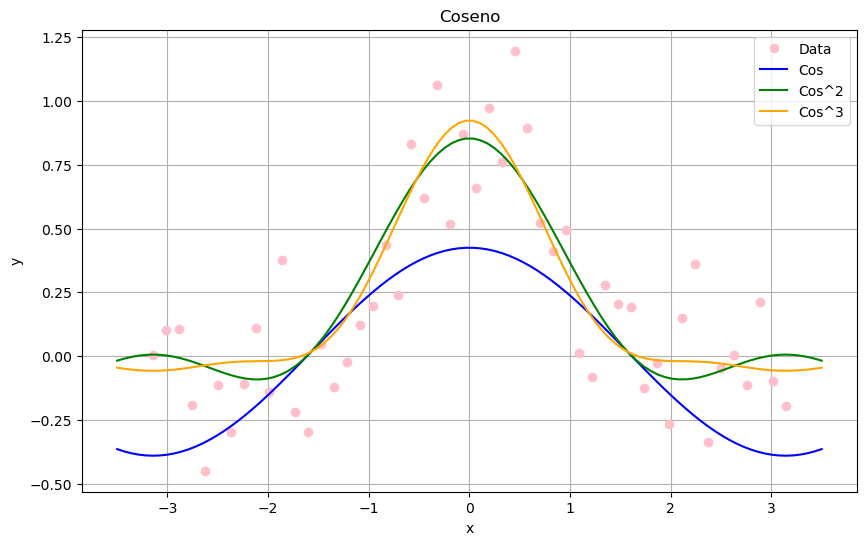

In [252]:
import matplotlib.pyplot as plt

xs = np.linspace(-3.5, 3.5, 100)
y1 = a1[0] + a1[1]*np.cos(xs)
y2 = a2[0] + a2[1]*np.cos(xs)+ a2[2]*(np.cos(xs)**2) 
y3 = a3[0] + a3[1]*np.cos(xs)+ a3[2]*(np.cos(xs)**2) + a3[3]*(np.cos(xs)**3)

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.plot(xs, y1, label='Cos', color='blue')
plt.plot(xs, y2, label='Cos^2', color='green')
plt.plot(xs, y3, label='Cos^3', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coseno')
plt.grid(True)
plt.legend()
plt.show()

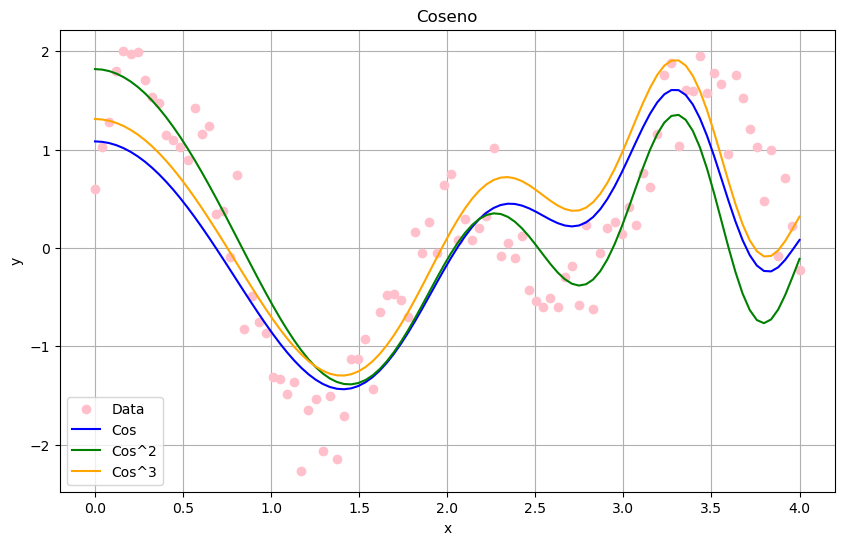

Las funciones propuestas para aproximar los datos del conjunto 3ii son:  a1[0] + a1[1] * cos(xs), a2[0] + a2[1] * cos^2(xs), a3[0] + a3[1] * cos^3(xs) con distinta cantidad de parametros y presicion
Los errores de las 3 funciones de aproximacion propuestasson respectivamente :  [6.5336788, 5.77820038, 6.32141263]


In [105]:
#vector parametros = a
#vector resultados = y
x, y = np.load("ejercicio_3_ii.npy")
x = np.array(x)
y = np.array(y)

O = 2 #2
P = 2 #2

matrix_design = np.column_stack((x,np.cos(x*O),np.sin(x**P)))
matrix_designT = np.transpose(matrix_design)
inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a1 = np.matmul(inverse,y)
# Calcular el error de aproximación
y_predicha1 = np.matmul(matrix_design,a1)
aproximation_error1 = np.sqrt(np.matmul(np.transpose(y - y_predicha1),(y - y_predicha1)))

matrix_design = np.column_stack((x,np.cos(x*O),np.sin(x**P), np.cos(x)))
matrix_designT = np.transpose(matrix_design)
inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a2 = np.matmul(inverse,y)
# Calcular el error de aproximación
y_predicha2 = np.matmul(matrix_design,a2)
aproximation_error2 = np.sqrt(np.matmul(np.transpose(y - y_predicha2),(y - y_predicha2)))

matrix_design = np.column_stack((x,np.cos(x*O),np.sin(x**P), np.cos(x)**2))
matrix_designT = np.transpose(matrix_design)
inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a3 = np.matmul(inverse,y)
# Calcular el error de aproximación
y_predicha3 = np.matmul(matrix_design,a3)
aproximation_error3 = np.sqrt(np.matmul(np.transpose(y - y_predicha3),(y - y_predicha3)))

xs = np.linspace(0, 4, 100)
y1 = a1[0] + a1[1]*(np.cos(xs*O))+a1[2]*(np.sin(xs**P))
y2 = a2[0] + a2[1]*(np.cos(xs*O))+a2[2]*(np.sin(xs**P)) + a2[3]*(np.cos(xs))
y3 = a3[0] + a3[1]*(np.cos(xs*O))+a3[2]*(np.sin(xs**P)) + a3[3]*(np.cos(xs)**2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.plot(xs, y1, label='Cos', color='blue')
plt.plot(xs, y2, label='Cos^2', color='green')
plt.plot(xs, y3, label='Cos^3', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coseno')
plt.grid(True)
plt.legend()
plt.show()

list= [aproximation_error1,aproximation_error2,aproximation_error3]
vr = []
for x in list:
    vr.append(round(np.mean(x),8))
print('Las funciones propuestas para aproximar los datos del conjunto 3ii son:  a1[0] + a1[1] * cos(xs), a2[0] + a2[1] * cos^2(xs), a3[0] + a3[1] * cos^3(xs) con distinta cantidad de parametros y presicion')
print('Los errores de las 3 funciones de aproximacion propuestasson respectivamente : ',vr)


Ejercicio 4. Ajustes no lineales.
a)Hallar la curva de la forma f (x) = a xb que mejor aproxima el conjunto de datos (4.a) en el sentido
de cuadrados mínimos.
Sugerencia: recordar qué propiedades cumplen los logaritmos y ajustar por cuadrados mínimos la
función log(f (x)).
b)Repetir con el conjunto de datos (4.b) y una curva de la forma f (x) = a bx.
c)Graficar en dos figuras distintas los conjuntos de datos y las curvas ajustadas en cada caso.

La funcion propuesta para el conjunto de datos 4.i es: 0.57 + 0.27 * log(xs)


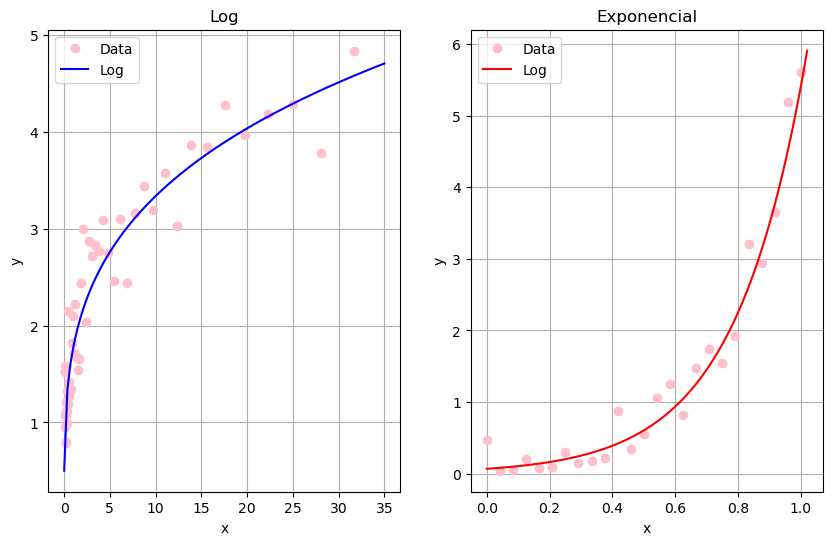

3. Este es el error de aproximación dado el código para el conjunto 3i: 1.29
3. Este es el error de aproximación dado el código para el conjunto 3ii: 2.77
La funcion propuesta para el conjunto de datos 4.ii es: -2.7 + 4.38 * exp(xs)


In [106]:
x, y = np.load("ejercicio_4_a.npy")
x = np.array(x)
y = np.array(y)
log_y = np.log(y)

matrix_design = np.column_stack((np.ones_like(x),np.log(x)))
matrix_designT = np.transpose(matrix_design)
inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,log_y)
# Calcular el error de aproximación
y_predicha = np.matmul(matrix_design,a)
aproximation_error1 = np.sqrt(np.matmul(np.transpose(log_y - y_predicha),(log_y - y_predicha)))
#ax^b
# log(a) + b log(x)
xs = np.linspace(0.01, 35, 100)
y1 = np.exp(a[0]) * ((xs)**a[1])

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.plot(xs, y1, label='Log', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Log')
plt.grid(True)
plt.legend()

print('La funcion propuesta para el conjunto de datos 4.i es:',  round(a[0], 2), '+' , round(a[1], 2 ), '* log(xs)')

x, y = np.load("ejercicio_4_b.npy")
x = np.array(x)
y = np.array(y/100)
log_y = np.log(y)
errores_vec = {}
# for degree in range(2,5):
#     matrix_design = np.column_stack((np.ones_like(x),x**degree))
#     matrix_design = np.column_stack((matrix_design,x**(degree+1)))
matrix_design = np.column_stack((np.ones_like(x),x))
matrix_designT = np.transpose(matrix_design)
inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
a = np.matmul(inverse,log_y)
# Calcular el error de aproximación
y_predicha = np.matmul(matrix_design,a)
aproximation_error2 = np.sqrt(np.matmul(np.transpose(log_y - y_predicha),(log_y - y_predicha)))
#ab^x
# errores_vec[aproximation_error2] = (a[0],a[1])
    
# a = (errores_vec[min(errores_vec)])
# print(errores_vec)
xs = np.linspace(0, 1.02, 100)
y1 = np.exp(a[0]) * (np.exp(a[1])**xs)

plt.subplot(1, 2, 2)
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.plot(xs, y1, label='Log', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponencial')
plt.grid(True)
plt.legend()
plt.show()
print('3. Este es el error de aproximación dado el código para el conjunto 3i:', round(aproximation_error1, 2))
print('3. Este es el error de aproximación dado el código para el conjunto 3ii:', round(aproximation_error2, 2))
print('La funcion propuesta para el conjunto de datos 4.ii es:',  round(a[0], 2), '+' , round(a[1], 2 ), '* exp(xs)')

Ejercicio 5. Cuadrados Mínimos Ponderados
En situaciones en las cuales los pares ordenados en el conjunto de datos no tienen la misma variabilidad o no pueden considerarse igualmente precisos, es deseable realizar un ajuste que considere estas diferencias.
Por ejemplo, el uso de diferentes instrumentos de medición o diferentes condiciones de medición derivan en mediciones con distintas magnitudes para el error. Queremos realizar un ajuste por cuadrados mínimos que considere la preferencia por datos más precisos. Para ello consideramos el método de cuadrados mínimos ponderados
a)
Comentar brevemente el objetivo del método de cuadrados mínimos ponderados. Luego, deducir la solución de cuadrados mínimos ponderados.
b)
Repetir los pasos del ejercicio 2, utilizando cuadrados mínimos ponderados con los datos de los archivos ejercicio_5_i.npy y ejercicio_5_ii.npy. Comparar con la solución de cuadrados mínimos convencional (sin considerar los pesos).
c)
¿Qué diferencias encuentra encuentra entre ambos conjuntos de datos? ¿Qué sucede con el ajuste de la función cuadrática al usar distintos pesos para los datos?¿y con el ajuste de una función cúbica?
d)
Graficar en una misma figura el conjunto de datos y las curvas cuadráticas ajustadas. Mostrar en una figura lateral los pesos correspondientes a cada caso

In [151]:
import numpy as np
def Calcular_parametros_error_ponderados(design, y, IW):
    IWdiagonal = np.diag(IW)
    matrix_design = np.column_stack(design)
    matrix_designT = np.transpose(matrix_design)
    inverse = np.matmul(np.linalg.inv(np.matmul(np.matmul(matrix_designT,IWdiagonal),matrix_design)),np.matmul(matrix_designT,IWdiagonal))
    a = np.matmul(inverse,y)
    # Calcular el error de aproximación
    y_predicha = np.matmul(matrix_design,a)
    aproximation_error = np.sqrt(np.matmul(np.transpose(y - y_predicha),(y - y_predicha)))
    return (a,aproximation_error)

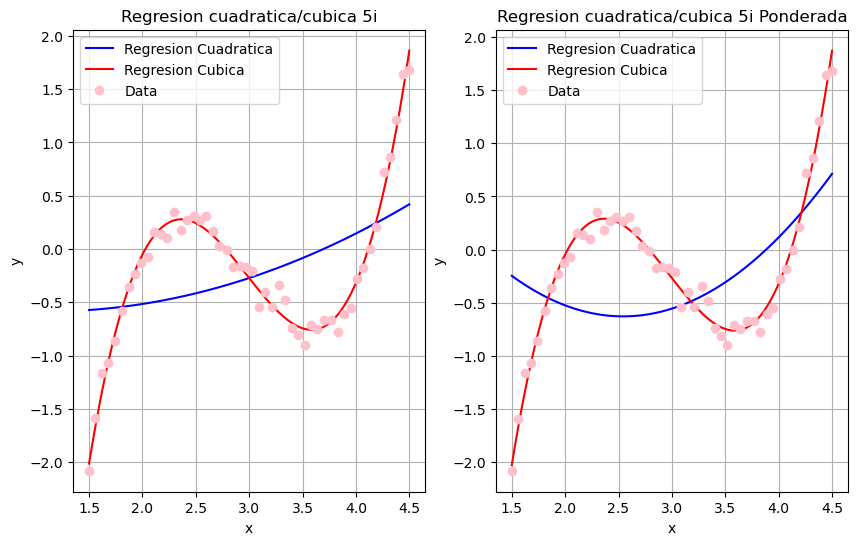

4.419941268910651 0.6797401872124951
4.640710295941598 0.6813576077454334


In [155]:
x, y, IW = np.load("ejercicio_5_i.npy")
a2 = Calcular_parametros_error((np.ones_like(x),x,x**2),y)
a3 = Calcular_parametros_error((np.ones_like(x),x,x**2,x**3),y)

error2 = a2[1]
a2 = a2[0]
error3 = a3[1]
a3 = a3[0]

xs = np.linspace(1.5, 4.5, 100)
ys = a2[0] + a2[1]*xs + a2[2]*xs**2
yss = a3[0] + a3[1]*xs + a3[2]*xs**2 + a3[3]*xs**3

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, ys, label='Regresion Cuadratica', color='blue')
plt.plot(xs, yss, label='Regresion Cubica', color='red')
plot('Regresion cuadratica/cubica 5i')


IWdiagonal = np.diag(IW)

a2 = Calcular_parametros_error_ponderados((np.ones_like(x),x,x**2),y,IW)
a3 = Calcular_parametros_error_ponderados((np.ones_like(x),x,x**2,x**3),y,IW)

error2pon = a2[1]
a2 = a2[0]
error3pon = a3[1]
a3 = a3[0]

xs = np.linspace(1.5, 4.5, 100)
ys = a2[0] + a2[1]*xs + a2[2]*xs**2
yss = a3[0] + a3[1]*xs + a3[2]*xs**2 + a3[3]*xs**3

plt.subplot(1, 2, 2)
plt.plot(xs, ys, label='Regresion Cuadratica', color='blue')
plt.plot(xs, yss, label='Regresion Cubica', color='red')
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion cuadratica/cubica 5i Ponderada')
plt.grid(True)
plt.legend()
plt.show()

print(error2,error3)
print(error2pon,error3pon)


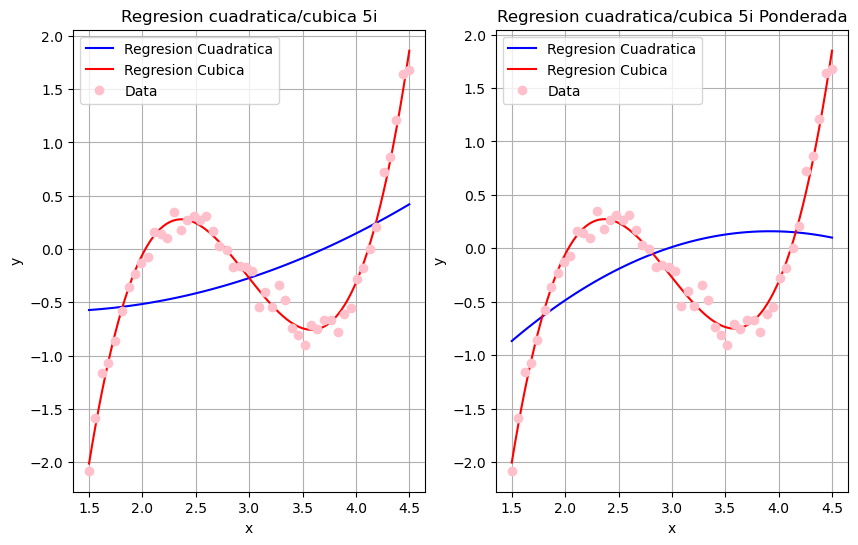

4.419941268910651 0.6797401872124951
4.640274797353758 0.680871595944403


In [156]:
x, y, IW = np.load("ejercicio_5_ii.npy")
a2 = Calcular_parametros_error((np.ones_like(x),x,x**2),y)
a3 = Calcular_parametros_error((np.ones_like(x),x,x**2,x**3),y)

error2 = a2[1]
a2 = a2[0]
error3 = a3[1]
a3 = a3[0]

xs = np.linspace(1.5, 4.5, 100)
ys = a2[0] + a2[1]*xs + a2[2]*xs**2
yss = a3[0] + a3[1]*xs + a3[2]*xs**2 + a3[3]*xs**3

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, ys, label='Regresion Cuadratica', color='blue')
plt.plot(xs, yss, label='Regresion Cubica', color='red')
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion cuadratica/cubica 5i')
plt.grid(True)
plt.legend()


IWdiagonal = np.diag(IW)

a2 = Calcular_parametros_error_ponderados((np.ones_like(x),x,x**2),y,IW)
a3 = Calcular_parametros_error_ponderados((np.ones_like(x),x,x**2,x**3),y,IW)

error2pon = a2[1]
a2 = a2[0]
error3pon = a3[1]
a3 = a3[0]

xs = np.linspace(1.5, 4.5, 100)
ys = a2[0] + a2[1]*xs + a2[2]*xs**2
yss = a3[0] + a3[1]*xs + a3[2]*xs**2 + a3[3]*xs**3

plt.subplot(1, 2, 2)
plt.plot(xs, ys, label='Regresion Cuadratica', color='blue')
plt.plot(xs, yss, label='Regresion Cubica', color='red')
plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion cuadratica/cubica 5i Ponderada')
plt.grid(True)
plt.legend()
plt.show()

print(error2,error3)
print(error2pon,error3pon)